In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import time
import datetime
import pandas as pd

In [2]:
## Convert given date to unix-milliseconds
date1 = '2022-01-30'
unix = pd.to_datetime(date1).value // 10**9
print(date1,":",unix)

date2 = '2022-01-31'
unix = pd.to_datetime(date2).value // 10**9
print(date2,":",unix)

2022-01-30 : 1643500800
2022-01-31 : 1643587200


In [12]:
url = 'https://api.coingecko.com/api/v3/coins/dogecoin/market_chart/range?vs_currency=usd&from=1643500800&to=1643587200'
## Preparing the Request
req = Request('GET', url)

## Creating the Session
sess = Session()

## Making the Request
prepped = sess.prepare_request(req)

## Sending the Request
try:
    resp = sess.send(prepped)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)
else:
    print(resp.status_code, resp.reason)
    print(resp.text)
    

200 OK
{"prices":[[1643501041928,0.14347798946668067],[1643501380396,0.14351684057325917],[1643501616375,0.14365966369423783],[1643501941709,0.14338242008261629],[1643502262628,0.14313298869996646],[1643502513193,0.1428479409998025],[1643502849225,0.14251741637618945],[1643503199478,0.1423941428761295],[1643503535530,0.14161823854961492],[1643503773404,0.14151743735139485],[1643504089771,0.1418757268177226],[1643504415188,0.14187224997270748],[1643504669316,0.1418635160781288],[1643504900551,0.14201746195984577],[1643505239471,0.142320892876702],[1643505559820,0.14244386045905524],[1643505847043,0.1424302457253433],[1643506207653,0.14272516201243388],[1643506460342,0.14282579243273352],[1643506727225,0.14266710660255016],[1643507035115,0.1424120983761774],[1643507392508,0.14224947889571274],[1643507695297,0.14231307083282274],[1643507977586,0.1423139049247042],[1643508305603,0.1425066043186465],[1643508578614,0.14248293617664415],[1643508860447,0.1423947191172593],[1643509133778,0.1424

In [13]:
data = json.loads(resp.text)
prices = data['prices']

df = pd.DataFrame(prices)

In [14]:
df.head()

,0,1
0,1643501041928,0.143478
1,1643501380396,0.143517
2,1643501616375,0.143660
3,1643501941709,0.143382
4,1643502262628,0.143133


In [15]:
## Change column names to ['timestamp', 'price']
df.columns = ['timestamp', 'price']
df.head()

,timestamp,price
0,1643501041928,0.143478
1,1643501380396,0.143517
2,1643501616375,0.143660
3,1643501941709,0.143382
4,1643502262628,0.143133


In [16]:
## Convert timestamp format from unix-milliseconds to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df.head()

,timestamp,price
0,2022-01-30 00:04:01.928,0.143478
1,2022-01-30 00:09:40.396,0.143517
2,2022-01-30 00:13:36.375,0.143660
3,2022-01-30 00:19:01.709,0.143382
4,2022-01-30 00:24:22.628,0.143133


In [17]:
## Seperate date and time from timestamp column
df['date'] = df['timestamp'].dt.date
df['time'] = df['timestamp'].dt.time
## Drope timestamp column
df.drop(columns=['timestamp'], inplace=True)
df.head()

,price,date,time
0,0.143478,2022-01-30,00:04:01.928000
1,0.143517,2022-01-30,00:09:40.396000
2,0.143660,2022-01-30,00:13:36.375000
3,0.143382,2022-01-30,00:19:01.709000
4,0.143133,2022-01-30,00:24:22.628000


In [18]:
## Remove value after decimal point from second in time column
df['time'] = df['time'].astype(str).str[:8]
df.head()

,price,date,time
0,0.143478,2022-01-30,00:04:01
1,0.143517,2022-01-30,00:09:40
2,0.143660,2022-01-30,00:13:36
3,0.143382,2022-01-30,00:19:01
4,0.143133,2022-01-30,00:24:22


<AxesSubplot:xlabel='time'>

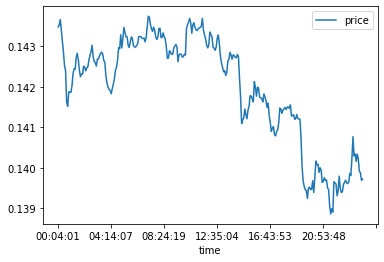

In [19]:
## Plot the price data in a line chart
df.plot(x='time', y='price', kind='line')

In [20]:
data_loc = '../Data/'
df.to_csv(data_loc + 'dogecoin_price_data.csv', index=False)